### synthetic-dataset
---

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Feature (X)
X = np.linspace(0, 10, n_samples)

# Target (y) with linear relation + noise
y = 3 * X + 7 + np.random.normal(0, 2, n_samples)

# Create DataFrame
df = pd.DataFrame({"X": X, "y": y})

df.head()  # Show first 5 rows


,X,y
0,0.00000,7.993428
1,0.10101,7.026502
2,0.20202,8.901438
3,0.30303,10.955151
4,0.40404,7.743814


In [2]:
df.shape

(100, 2)

---

### Code of linear regression from scratch

In [16]:
class lr():
    def __init__(self):
        self.slope = None
        self.intercept = None
    
    def fit(self,x_train,y_train):
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        num = 0
        den = 0 
        for i in range(x_train.shape[0]):
            num += ((x_train[i] - x_train.mean())*(y_train[i] - y_train.mean()))
            den += (x_train[i]-x_train.mean())**2
        
        self.slope = num/den
        self.intercept = y_train.mean() - self.slope*x_train.mean()

    def predict(self , x_test):
        return self.slope*x_test + self.intercept

---

### Prediction of My Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

lr_x = df['X']
lr_y = df['y']

x_train ,x_test ,y_train , y_test = train_test_split(lr_x,lr_y,test_size = 0.2,random_state = 42)

my_model = lr()

my_model.fit(x_train , y_train)

y_pred = my_model.predict(x_test)



In [33]:
x_train.shape

(80,)

In [25]:
from sklearn.metrics import r2_score

mylr_r2_score = r2_score(y_test , y_pred )
print(f'R2 score of mylr :{mylr_r2_score}')

R2 score of mylr :0.968345944528421


---
### Scikit_learn Model


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

sk_x = df[['X']]
sk_y = df['y']

sk_x_train , sk_x_test , sk_y_train , sk_y_test = train_test_split(sk_x , sk_y , test_size = 0.2 , random_state = 42)

sk_model = LinearRegression()

sk_model.fit(sk_x_train , sk_y_train)
sk_y_pred = sk_model.predict(sk_x_test)



In [26]:
from sklearn.metrics import r2_score

sk_r2_score = r2_score(sk_y_test , sk_y_pred)
print(f'R2 score of msk_lr :{sk_r2_score}')

R2 score of msk_lr :0.968345944528421


---
### Side by side comparsion of both model

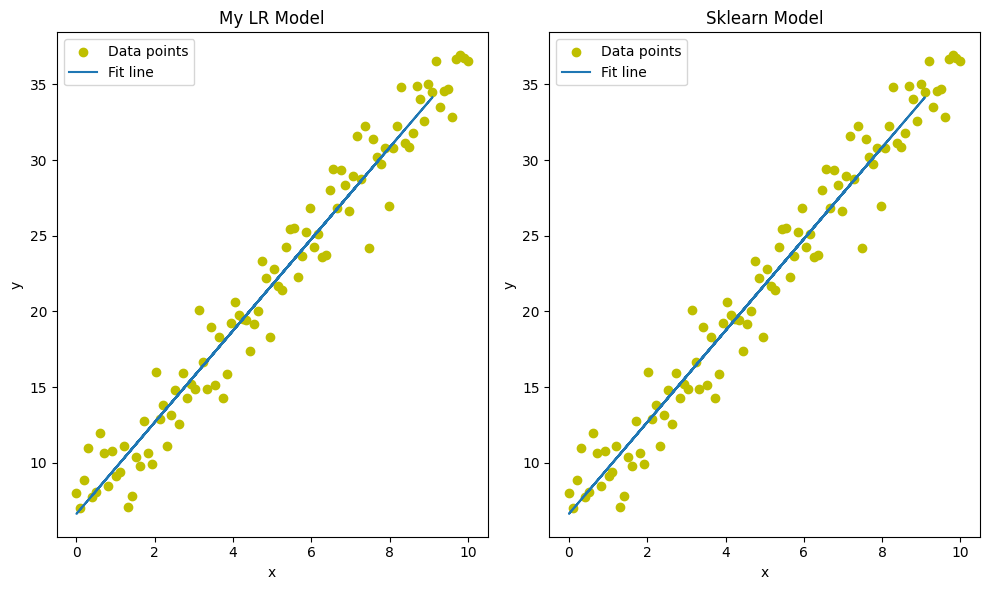

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# --- Left subplot: Your custom LR ---
plt.subplot(1,2,1)
plt.scatter(X, y, color='y', label='Data points')
plt.plot(x_test, y_pred, label='Fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title("My LR Model")
plt.legend()

# --- Right subplot: Sklearn LR ---
plt.subplot(1,2,2)
plt.scatter(X, y, color='y', label='Data points')
plt.plot(x_test, sk_y_pred, label='Fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Sklearn Model")
plt.legend()

plt.tight_layout()  # adjusts spacing
plt.show()
